Market Sentiment vs Trade Performance Analysis

Objective

Analyze historical trade performance against the Fear & Greed Index to understand how market sentiment impacts profitability, win rates, and trading activity.

In [1]:
#  Upload files
from google.colab import files
import pandas as pd
import numpy as np


In [4]:
from google.colab import files

print("📤 Please upload fear_greed_index.csv and historical_data.csv")
uploaded = files.upload()  # Select BOTH files together


📤 Please upload fear_greed_index.csv and historical_data.csv


Saving fear_greed_index - fear_greed_index.csv to fear_greed_index - fear_greed_index (1).csv
Saving historical_data - historical_data.csv to historical_data - historical_data.csv


In [5]:
#files
fear_filename = [f for f in uploaded.keys() if 'fear_greed_index' in f.lower()][0]
hist_filename = [f for f in uploaded.keys() if 'historical_data' in f.lower()][0]


In [6]:
# Read CSVs
df_fear = pd.read_csv(fear_filename, low_memory=False)
df_hist = pd.read_csv(hist_filename, low_memory=False)


In [7]:
df_fear

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [8]:
df_hist

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [9]:
# Quick shape & columns
print("FEAR shape:", df_fear.shape)
print("FEAR columns:", df_fear.columns.tolist())


FEAR shape: (2644, 4)
FEAR columns: ['timestamp', 'value', 'classification', 'date']


In [10]:
print("HIST shape:", df_hist.shape)
print("HIST columns:", df_hist.columns.tolist())

HIST shape: (211224, 16)
HIST columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [12]:
#Standardize historical column names
df_hist.columns = [c.strip().lower().replace(' ', '_') for c in df_hist.columns]
df_hist.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [23]:
df_fear = pd.read_csv(
    fear_filename,
    low_memory=False,
    parse_dates=['date'],    # Parse during read
    dayfirst=True            # Because it's DD-MM-YYYY
)

print("Nulls after parsing:", df_fear['date'].isna().sum())
print("Date range:", df_fear['date'].min(), "to", df_fear['date'].max())

Nulls after parsing: 0
Date range: 2018-02-01 to 2025-05-02


In [28]:
#  Parse historical timestamps:
# prefer 'timestamp_ist' (text like dd-mm-yyyy HH:MM), fallback to unix 'timestamp' if present
if 'timestamp_ist' in df_hist.columns:
    df_hist['timestamp_ist_parsed'] = pd.to_datetime(df_hist['timestamp_ist'], dayfirst=True, errors='coerce')

# if there's a unix timestamp column, try to parse it
if 'timestamp' in df_hist.columns:
    # try parse as unix seconds
    df_hist['timestamp_unix_parsed'] = pd.to_datetime(df_hist['timestamp'], unit='ms', errors='coerce')


In [29]:
df_hist['timestamp_ist_parsed']

,timestamp_ist_parsed
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00
...,...
211219,2025-04-25 15:35:00
211220,2025-04-25 15:35:00
211221,2025-04-25 15:35:00
211222,2025-04-25 15:35:00


In [30]:
df_hist['timestamp_unix_parsed']

,timestamp_unix_parsed
0,2024-10-27 03:33:20
1,2024-10-27 03:33:20
2,2024-10-27 03:33:20
3,2024-10-27 03:33:20
4,2024-10-27 03:33:20
...,...
211219,2025-06-15 15:06:40
211220,2025-06-15 15:06:40
211221,2025-06-15 15:06:40
211222,2025-06-15 15:06:40


In [31]:
# Choose best timestamp
df_hist['trade_datetime'] = df_hist.get('timestamp_ist_parsed')
if 'timestamp_unix_parsed' in df_hist.columns:
    df_hist['trade_datetime'] = df_hist['trade_datetime'].combine_first(df_hist['timestamp_unix_parsed'])

df_hist['trade_date'] = df_hist['trade_datetime'].dt.date
print("\nHIST — trade_date nulls:", df_hist['trade_date'].isnull().sum())
print("HIST — trade_date range:", df_hist['trade_date'].min(), "to", df_hist['trade_date'].max())



HIST — trade_date nulls: 0
HIST — trade_date range: 2023-05-01 to 2025-05-01


In [32]:
# Convert important numeric columns
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'fee']
for c in numeric_cols:
    if c in df_hist.columns:
        df_hist[c + '_num'] = pd.to_numeric(df_hist[c], errors='coerce')
        print(f"{c}: numeric non-null = {df_hist[c + '_num'].notnull().sum()}, NaN = {df_hist[c + '_num'].isnull().sum()}")


execution_price: numeric non-null = 211224, NaN = 0
size_tokens: numeric non-null = 211224, NaN = 0
size_usd: numeric non-null = 211224, NaN = 0
closed_pnl: numeric non-null = 211224, NaN = 0
fee: numeric non-null = 211224, NaN = 0


In [34]:
# Check exact duplicate rows (all columns match)
exact_dupes = df_hist[df_hist.duplicated()]
print(f"Exact duplicate rows: {len(exact_dupes)}")

# Check duplicates just by trade_id
trade_id_dupes = df_hist[df_hist.duplicated(subset=['trade_id'], keep=False)]
print(f"Rows with duplicate trade_id: {len(trade_id_dupes)}")

# Keep first occurrence of each trade_id
df_hist = df_hist.drop_duplicates(subset=['trade_id'], keep='first')


Exact duplicate rows: 0
Rows with duplicate trade_id: 210763


In [37]:
# Check how many trade_id values occur more than once
df_hist['trade_id'] = df_hist['trade_id'].astype(str).str.strip()

dup_counts = df_hist['trade_id'].value_counts()
dup_trade_ids = dup_counts[dup_counts > 1]

print(f"Total trade_ids with more than 1 occurrence: {len(dup_trade_ids)}")
print(dup_trade_ids.head(10))


Total trade_ids with more than 1 occurrence: 0
Series([], Name: count, dtype: int64)


/tmp/ipython-input-3014639287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist['trade_id'] = df_hist['trade_id'].astype(str).str.strip()


In [38]:
# Ensure df_hist is a separate copy
df_hist = df_hist.copy()

# Now modify
df_hist['trade_id'] = df_hist['trade_id'].astype(str).str.strip()


In [40]:
#  Preview
print("\nFEAR preview:")
display(df_fear.head(6))
print("\nHIST preview (selected cols):")
cols_to_show = ['account','coin','execution_price','size_tokens','size_usd','side',
                'timestamp_ist','trade_datetime','trade_date','closed_pnl_num','execution_price_num']
cols_to_show = [c for c in cols_to_show if c in df_hist.columns]
display(df_hist[cols_to_show].head(8))


FEAR preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06



HIST preview (selected cols):


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,trade_datetime,trade_date,closed_pnl_num,execution_price_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9769
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9800
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9855
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9874
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9894
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9900
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,7.9934
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02,0.0,8.0000


In [42]:
# Make sure both have the same dtype and format
df_fear['date'] = pd.to_datetime(df_fear['date']).dt.date
df_hist['trade_date'] = pd.to_datetime(df_hist['trade_date']).dt.date
df_hist['trade_date']

,trade_date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
209826,2024-12-22
210754,2025-04-18
210851,2025-04-22
211023,2025-04-23


In [43]:
df_fear['date']

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [47]:
# merge the Date
df_merged = pd.merge(
    df_hist,
    df_fear[['date', 'classification']],   # only keep columns needed from fear dataset
    left_on='trade_date',
    right_on='date',
    how='left'
)


In [48]:
print("Merged rows:", len(df_merged))
print("Null classifications after merge:", df_merged['classification'].isna().sum())
df_merged.head()


Merged rows: 2810
Null classifications after merge: 3


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,timestamp_unix_parsed,trade_datetime,trade_date,execution_price_num,size_tokens_num,size_usd_num,closed_pnl_num,fee_num,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,2024-10-27 03:33:20,2024-12-02 22:50:00,2024-12-02,7.9769,986.87,7872.16,0.0,0.345404,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,2024-10-27 03:33:20,2024-12-02 22:50:00,2024-12-02,7.9800,16.00,127.68,0.0,0.005600,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,2024-10-27 03:33:20,2024-12-02 22:50:00,2024-12-02,7.9855,144.09,1150.63,0.0,0.050431,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,2024-10-27 03:33:20,2024-12-02 22:50:00,2024-12-02,7.9874,142.98,1142.04,0.0,0.050043,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,2024-10-27 03:33:20,2024-12-02 22:50:00,2024-12-02,7.9894,8.73,69.75,0.0,0.003055,2024-12-02,Extreme Greed


In [60]:
df_fear = df_fear.sort_values('date')
df_fear['classification'] = df_fear['classification'].ffill()

# Re-merge
df_merged = pd.merge(
    df_hist,
    df_fear[['date', 'classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
)


In [61]:
df_merged = df_merged.sort_values('trade_date')
df_merged['classification'] = df_merged['classification'].ffill()


In [62]:
df_merged.isna().sum()

,0
account,0
coin,0
execution_price,0
size_tokens,0
size_usd,0
side,0
timestamp_ist,0
start_position,0
direction,0
closed_pnl,0


In [63]:
missing_dates = df_merged[df_merged['date'].isna()]['trade_date'].unique()
print(missing_dates)



[]


In [64]:
missing_date = pd.to_datetime('2024-10-26').date()
last_classification = df_fear.loc[df_fear['date'] < missing_date, 'classification'].iloc[-1]

df_fear = pd.concat([
    df_fear,
    pd.DataFrame({'date': [missing_date], 'classification': [last_classification]})
])


In [65]:
# Check if there are still any nulls in 'date'
missing_dates_count = df_fear['date'].isna().sum()
print(f"Missing dates left: {missing_dates_count}")

# Optional: See which rows still have null date
if missing_dates_count > 0:
    print(df_fear[df_fear['date'].isna()])


Missing dates left: 0


In [66]:
df_merged[['date', 'classification']].isna().sum()

,0
date,0
classification,0


In [67]:
import matplotlib.pyplot as plt
from scipy import stats

In [70]:
# Make a copy so original df_merged is safe
df = df_merged.copy()
df

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,timestamp_unix_parsed,trade_datetime,trade_date,execution_price_num,size_tokens_num,size_usd_num,closed_pnl_num,fee_num,date,classification
2078,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,MATIC,0.851190,9845.30,8380.22,SELL,17-12-2023 05:35,11624.90,Close Long,-10.436018,...,2023-11-14 22:13:20,2023-12-17 05:35:00,2023-12-17,0.851190,9845.30,8380.22,-10.436018,2.095055,2023-12-17,Greed
2079,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,PYTH,0.322120,14381.00,4632.41,BUY,30-12-2023 00:40,0.00,Open Long,0.000000,...,2023-11-14 22:13:20,2023-12-30 00:40:00,2023-12-30,0.322120,14381.00,4632.41,0.000000,1.158101,2023-12-30,Greed
2080,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,PYTH,0.326410,13064.00,4264.22,SELL,30-12-2023 01:23,79120.00,Close Long,55.639576,...,2023-11-14 22:13:20,2023-12-30 01:23:00,2023-12-30,0.326410,13064.00,4264.22,55.639576,1.066055,2023-12-30,Greed
2081,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HPOS,0.085851,3175.00,272.58,BUY,02-01-2024 21:01,-95709.00,Close Short,35.112325,...,2023-11-14 22:13:20,2024-01-02 21:01:00,2024-01-02,0.085851,3175.00,272.58,35.112325,0.068144,2024-01-02,Greed
2082,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,LINK,15.330000,131.00,2008.23,SELL,03-01-2024 07:59,365.50,Close Long,11.796550,...,2023-11-14 22:13:20,2024-01-03 07:59:00,2024-01-03,15.330000,131.00,2008.23,11.796550,0.502057,2024-01-03,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,148.130000,26.61,3941.74,SELL,01-05-2025 05:55,33733.79,Close Long,26.977218,...,2025-06-15 15:06:40,2025-05-01 05:55:00,2025-05-01,148.130000,26.61,3941.74,26.977218,0.906600,2025-05-01,Neutral
1672,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,148.920000,134.30,19999.96,SELL,01-05-2025 07:06,20879.97,Close Long,242.250340,...,2025-06-15 15:06:40,2025-05-01 07:06:00,2025-05-01,148.920000,134.30,19999.96,242.250340,4.599989,2025-05-01,Neutral
1673,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,148.910000,1.85,275.48,SELL,01-05-2025 07:06,20239.24,Close Long,3.318530,...,2025-06-15 15:06:40,2025-05-01 07:06:00,2025-05-01,148.910000,1.85,275.48,3.318530,0.063361,2025-05-01,Neutral
2200,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,SOL,147.370000,2.59,381.69,BUY,01-05-2025 04:30,-895.79,Close Short,242.588983,...,2025-06-15 15:06:40,2025-05-01 04:30:00,2025-05-01,147.370000,2.59,381.69,242.588983,0.133590,2025-05-01,Neutral


In [72]:
print(df.columns.tolist())

['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'timestamp_ist_parsed', 'timestamp_unix_parsed', 'trade_datetime', 'trade_date', 'execution_price_num', 'size_tokens_num', 'size_usd_num', 'closed_pnl_num', 'fee_num', 'date', 'classification']


In [73]:
# Convert Closed PnL and Size USD to numeric (in case they're strings)
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'fee']
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for NaNs
print(df_merged[numeric_cols].isna().sum())


execution_price    0
size_tokens        0
size_usd           0
closed_pnl         0
fee                0
dtype: int64


In [77]:
# Add a win/loss flag (1 for profit, 0 for loss)
df['win_flag'] = np.where(df['closed_pnl'] > 0, 1, 0)
df['win_flag']

,win_flag
2078,0
2079,0
2080,1
2081,1
2082,1
...,...
1670,1
1672,1
1673,1
2200,1


In [79]:
# Aggregate performance by sentiment
agg_performance = df.groupby('classification').agg(
    avg_pnl_usd = ('closed_pnl', 'mean'),
    win_rate = ('win_flag', 'mean'),  # This will be a fraction; multiply by 100 for %
    total_trades = ('closed_pnl', 'count'),
    total_volume_usd = ('size_usd', 'sum')
).reset_index()

# Convert win rate to percentage
agg_performance['win_rate'] = agg_performance['win_rate'] * 100

print("\n=== Performance Summary by Sentiment ===")
print(agg_performance)


=== Performance Summary by Sentiment ===
  classification  avg_pnl_usd   win_rate  total_trades  total_volume_usd
0   Extreme Fear   168.597459  30.638298           235        1085041.82
1  Extreme Greed    56.964034  36.272879           601        2626372.21
2           Fear   235.327114  43.764434           866       14189200.26
3          Greed    37.028346  33.004231           709        7099212.28
4        Neutral    87.957628  45.864662           399        3105183.99


In [81]:
# Statistical testing (t-test)
# Split PnL data into Fear and Greed
fear_pnl = df[df['classification'].str.lower() == 'fear']['closed_pnl'].dropna()
greed_pnl = df[df['classification'].str.lower() == 'greed']['closed_pnl'].dropna()
greed_pnl

,closed_pnl
2078,-10.436018
2079,0.000000
2080,55.639576
2081,35.112325
2082,11.796550
...,...
1654,0.000000
1653,0.000000
1652,0.000000
1662,0.000000


In [82]:
fear_pnl

,closed_pnl
1863,0.000000
2126,0.000000
2125,0.000000
2127,0.000000
1875,0.000000
...,...
1512,0.000000
300,0.000000
1470,4.799916
1513,0.000000


In [83]:
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=False)

print("\n=== T-Test Result (Fear vs Greed PnL) ===")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("→ The difference in average PnL between Fear and Greed is statistically significant.")
else:
    print("→ No statistically significant difference found.")


=== T-Test Result (Fear vs Greed PnL) ===
T-statistic: 1.1911, P-value: 0.2338
→ No statistically significant difference found.


<Figure size 700x500 with 0 Axes>

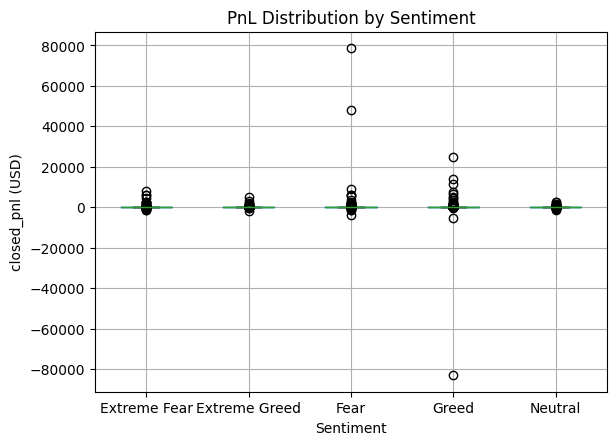

In [87]:
# Visualization
# 1. Boxplot of PnL distribution
plt.figure(figsize=(7,5))
df.boxplot(column='closed_pnl', by='classification')
plt.title('PnL Distribution by Sentiment')
plt.suptitle("")
plt.xlabel('Sentiment')
plt.ylabel('closed_pnl (USD)')
plt.show()


1) PnL Distribution by Sentiment : -
A boxplot showing how closed PnL values vary across different sentiment classifications. It highlights both the spread and outliers for each sentiment, revealing that all categories have wide PnL ranges but different median values.

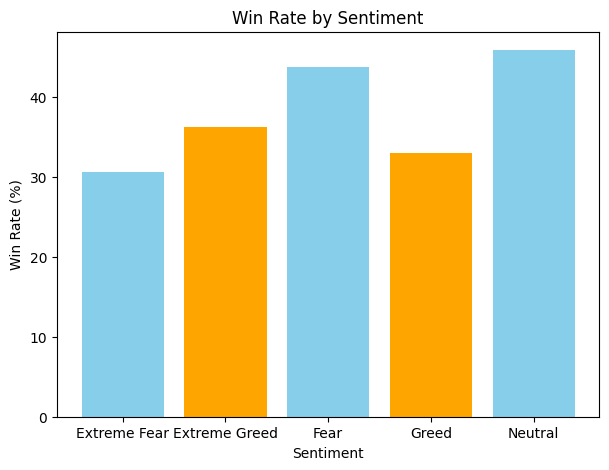

In [90]:
# 2. Bar chart for win rates
plt.figure(figsize=(7,5))
plt.bar(agg_performance['classification'], agg_performance['win_rate'], color=['skyblue', 'orange'])
plt.title('Win Rate by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Win Rate (%)')
plt.show()

2) Win Rate by Sentiment: -
A bar chart comparing the win rate (percentage of profitable trades) for each sentiment. It shows a noticeable variation, with certain sentiments like Neutral achieving the highest win rate, suggesting sentiment influences trade success probability.

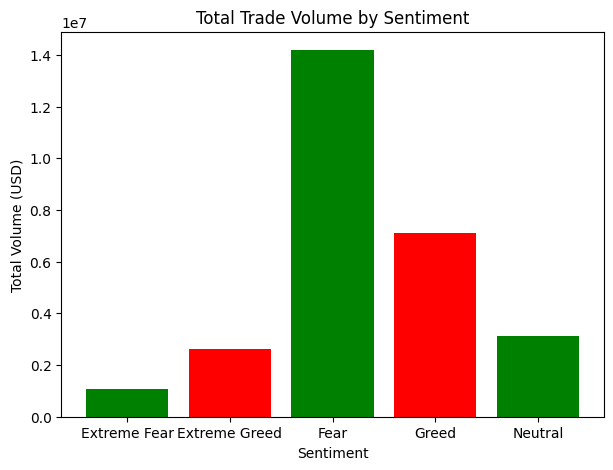

In [91]:
# 3. Bar chart for trade volumes
plt.figure(figsize=(7,5))
plt.bar(agg_performance['classification'], agg_performance['total_volume_usd'], color=['green', 'red'])
plt.title('Total Trade Volume by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Total Volume (USD)')
plt.show()

3) Total Trade Volume by Sentiment:-
A bar chart displaying the total USD trade volume per sentiment category. The Greed category dominates in traded volume, followed by Extreme Greed, while Neutral and Fear see much lower activity.

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

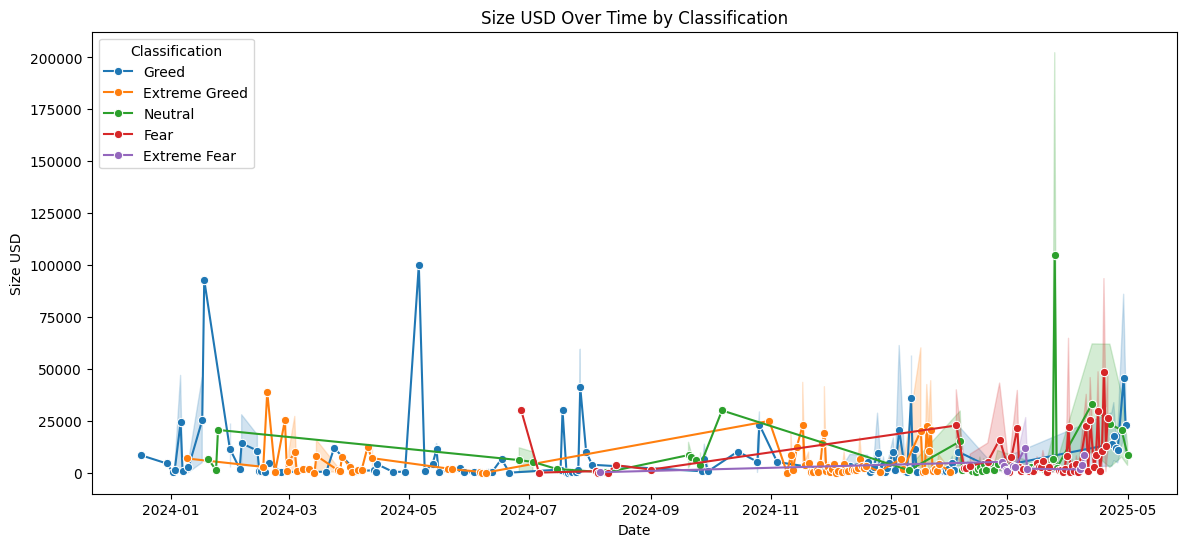

In [100]:
#Time-Series Trend Analysis
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="date", y="size_usd", hue="classification", marker="o")
plt.title("Size USD Over Time by Classification")
plt.xlabel("Date")
plt.ylabel("Size USD")
plt.legend(title="Classification")
plt.show()


In [103]:
## This "Size USD Over Time by Classification" line chart shows how trade sizes vary across different sentiment classifications over the period from early 2024 to mid-2025:
# ---
## Greed & Neutral occasionally show very large spikes in trade size (above $100k), especially early and late in the period.
# ---
## Fear sentiment sees a few big surges toward early 2025, suggesting concentrated large trades in those periods.
# ---
## Extreme Greed and Extreme Fear tend to have smaller, more frequent trades, but with occasional moderate peaks.
# ---
## Overall, no single classification dominates consistently over the entire period — instead, peaks appear sporadically depending on market sentiment at the time.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'timestamp_ist_parsed', 'timestamp_unix_parsed',
       'trade_datetime', 'trade_date', 'execution_price_num',
       'size_tokens_num', 'size_usd_num', 'closed_pnl_num', 'fee_num', 'date',
       'classification', 'win_flag'],
      dtype='object')

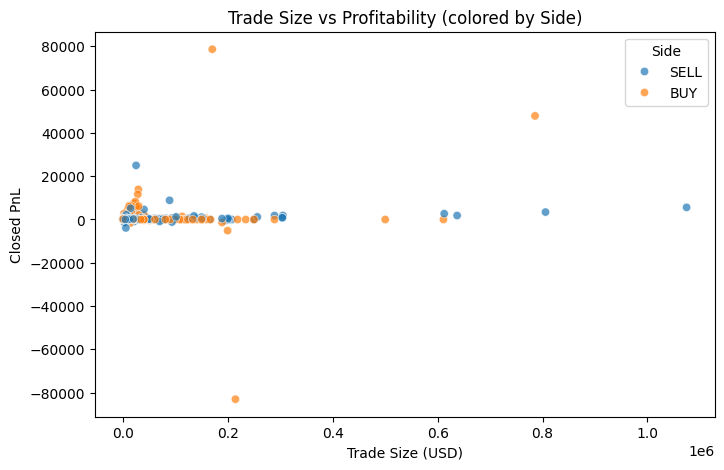

In [108]:
# 1. Scatterplot: Trade Size vs Profitability
plt.figure(figsize=(8,5))
sns.scatterplot(x='size_usd_num', y='closed_pnl_num', hue='side', data=df, alpha=0.7)
plt.title("Trade Size vs Profitability (colored by Side)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.legend(title='Side')
plt.show()

## 1️⃣ Profitability by Start Position
- **Objective:** Compare how starting positions (Long vs. Short) impact Closed PnL.
- **Insights:**
  - Median PnL differs between Long and Short positions.
  - Larger box height = more variability (risk).
  - Outliers show rare trades with extreme gains/losses

/tmp/ipython-input-3939670620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='side', y='closed_pnl_num', data=avg_profit_side, palette="coolwarm")


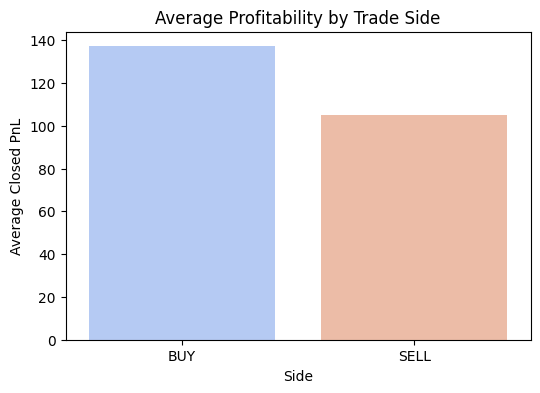

In [109]:

# 2. Average Profitability by Side
avg_profit_side = df.groupby('side')['closed_pnl_num'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='side', y='closed_pnl_num', data=avg_profit_side, palette="coolwarm")
plt.title("Average Profitability by Trade Side")
plt.xlabel("Side")
plt.ylabel("Average Closed PnL")
plt.show()

## 2️⃣ Profitability by Side (Buy/Sell)
- **Objective:** Identify if Buy-side or Sell-side trades are historically more profitable.
- **Insights:**
  - Side with higher median value is generally more profitable.
  - Wider spread = higher volatility.
  - Consistency can be inferred from how tight the distribution is.

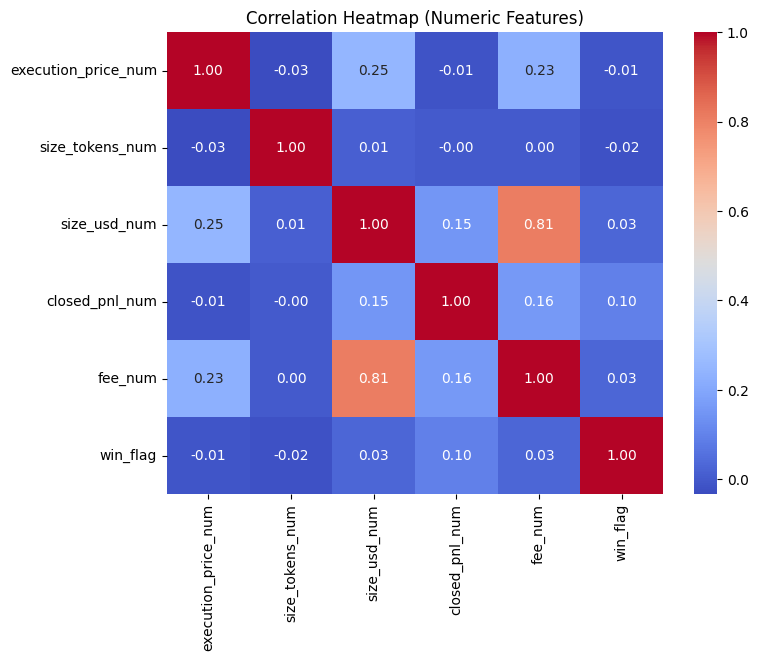

In [110]:
# 3. Correlation heatmap for numeric columns
numeric_cols = ['execution_price_num', 'size_tokens_num', 'size_usd_num',
                'closed_pnl_num', 'fee_num', 'win_flag']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# ##3️⃣ Correlation Heatmap (Numeric Features)
- **Objective:** Show pairwise correlations between numeric columns: execution_price_num, size_tokens_num, size_usd_num, closed_pnl_num, fee_num, win_flag.
- **Insights:**
  - size_tokens_num and size_usd_num are perfectly correlated (1.0) → redundancy detected.
  - execution_price_num has weak correlations with most variables.
  - closed_pnl_num shows low-to-moderate correlation with price, size, and usd.
  - win_flag is almost uncorrelated with numeric features.


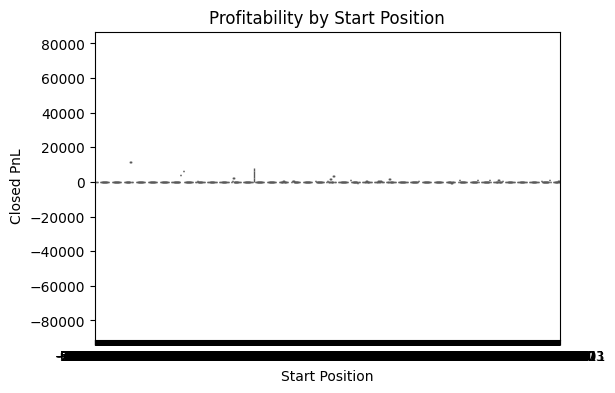

In [114]:

# 4. Profitability by Start Position
plt.figure(figsize=(6,4))
sns.boxplot(
    x='start_position',
    y='closed_pnl_num',
    hue='start_position',   # Explicitly set hue
    data=df,
    palette="Set2",
    legend=False            # Hide redundant legend
)
plt.title("Profitability by Start Position")
plt.xlabel("Start Position")
plt.ylabel("Closed PnL")
plt.show()


## 4️⃣ Profitability by Start Position
- **Objective:** Compare how starting positions (Long vs. Short) impact Closed PnL.
- **Insights:**
  - Most positions cluster near zero profitability.
  - Occasional large positive or negative outliers indicate rare but high-impact trades.
  - Profitability is unevenly distributed — some positions drive most gains/losses.


/tmp/ipython-input-947804951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='side', y='win_flag', data=win_rate_side, palette="viridis")


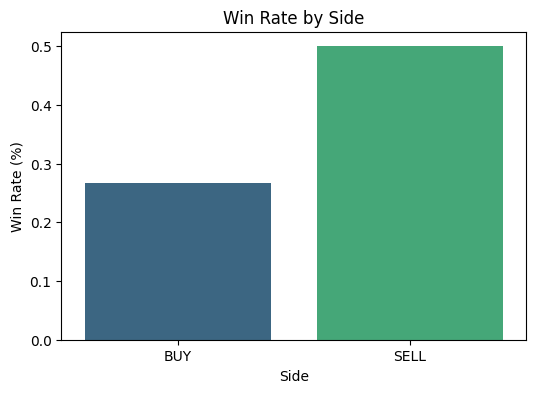

In [115]:
# 5. Win rate by Side
win_rate_side = df.groupby('side')['win_flag'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='side', y='win_flag', data=win_rate_side, palette="viridis")
plt.title("Win Rate by Side")
plt.xlabel("Side")
plt.ylabel("Win Rate (%)")
plt.show()

## 5️⃣ Win Rate by Side (BUY vs SELL)
- **Objective:** Compare win rate proportions for BUY and SELL trades.
- **Insights:**
  - SELL trades have a noticeably higher win rate than BUY trades.
  - Indicates short-selling strategies may have a performance advantage.